<a href="https://colab.research.google.com/github/nourey/Technical-Questionnaire---Prototype-and-Data-Analytics-Intern/blob/main/Programming_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import pandas as pd 

# plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import probplot
from mpl_toolkits.mplot3d import Axes3D



# statistics
import numpy as np
from scipy.stats import rankdata, norm
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
from sklearn.decomposition import PCA


# ml


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import FitFailedWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_recall_fscore_support



# Ignore warnings for warning combinations of hyperparameters for GridSearch
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [196]:
data = pd.read_csv('/content/dataset.csv')

data = data.dropna()

feature = data.loc[:, ['feature_1','feature_2','feature_3','feature_4']].copy()
labels  = data.loc[:, ['isVirus']].copy()

In [197]:
feature

,feature_1,feature_2,feature_3,feature_4
0,-0.233467,0.308799,2.484015,1.732721
1,1.519003,1.238482,3.344450,0.783744
2,0.400640,1.916748,3.291096,-0.918519
3,-1.616474,0.209703,1.461544,-0.291837
4,1.480515,5.299829,2.640670,1.867559
...,...,...,...,...
1991,5.153120,3.468305,3.112738,3.657268
1993,2.932724,1.681604,2.629296,2.054384
1994,2.532559,2.139847,3.859104,2.190373
1996,4.059027,1.977436,2.144760,4.257220


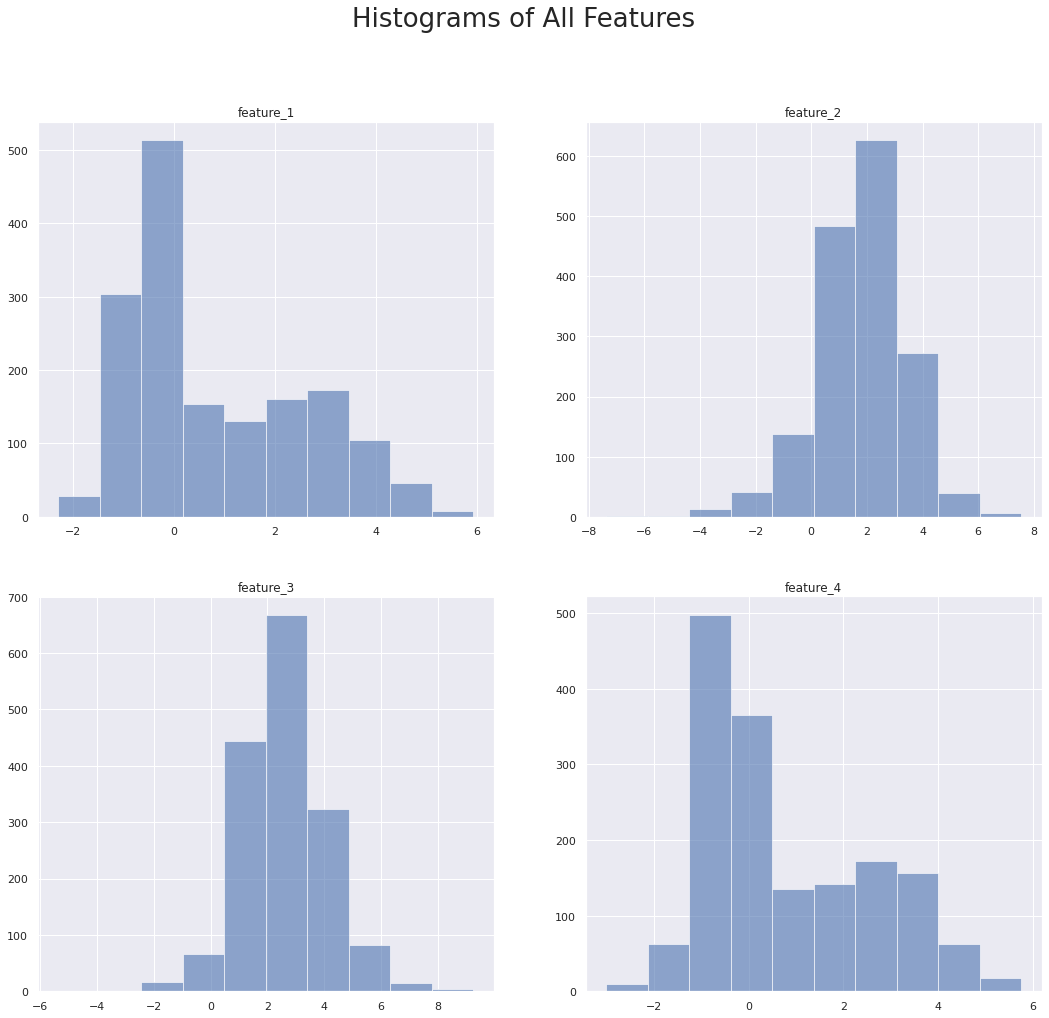

In [198]:
fig, axs = plt.subplots(2, 2,figsize=(18, 16))

for i, col in enumerate(feature.columns):
    row = i // 2
    column = i % 2
    axs[row, column].hist(feature[col], bins=10, alpha=.6)
    axs[row, column].set_title(col)


plt.subplots_adjust(hspace=0.2, wspace=0.2)
fig.suptitle('Histograms of All Features',fontsize=26)

plt.show()

# Looking Normal Distributions of the features
Histogram Plots shows that all features needs transformation to be normalized.



*   feature_1 and feature_4 has positive skewness
*   feature_2 has left skewness and peak at the mean
*   feature_3 has a little positive skewness and also peak at the mean 




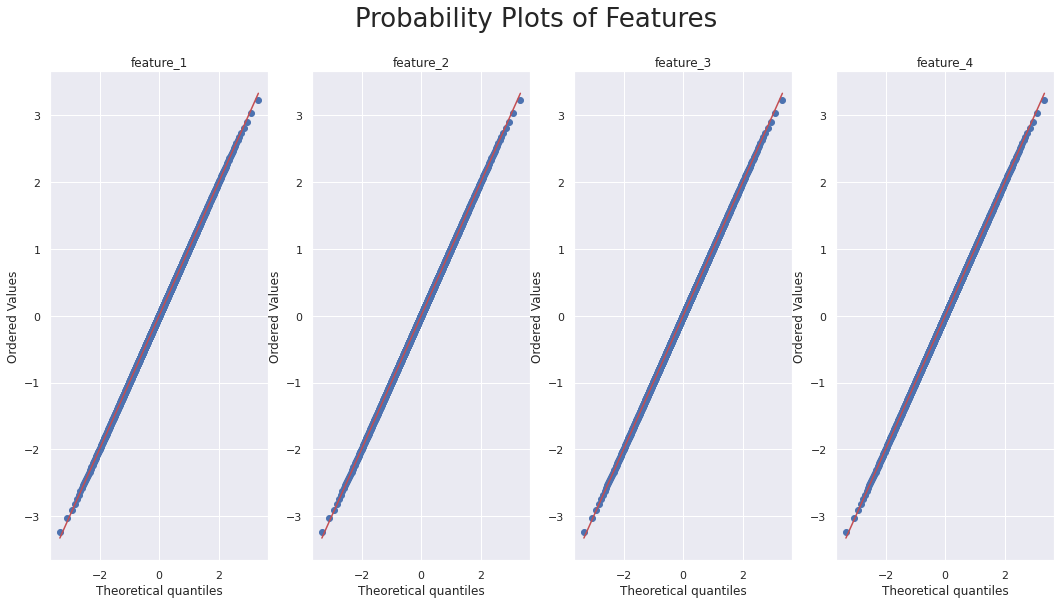

In [235]:
fig, axs = plt.subplots(1, 4, figsize=(18, 9))

for i, col in enumerate(feature.columns):
    stats.probplot(feature[col], plot=axs[i])
    axs[i].set_title(col)

fig.suptitle('Probability Plots of Features',fontsize=26)
plt.show()


# Normalizing Features

I tried various types of Transformation methods such as;

*   Box-Cox Transformation
*   Quantile Transformation
*   Logarithmic Transformations (Natural Log and Log10)
*   Square Root, Cube Root Transformation
*   Hyperbolic Archsine Transformation 
*   Power Transformation
*   Inverse Transformation
*   Yeo-Johnson Transformation 
*   Rank Based Inverse Transformation

In all of these transformation Rank Based transformation has perfectly normalized all features.






In [200]:
for col in feature.columns:
  feature[col] = rankdata(feature[col])
  feature[col] = norm.ppf(feature[col] / (len(feature[col]) + 1))

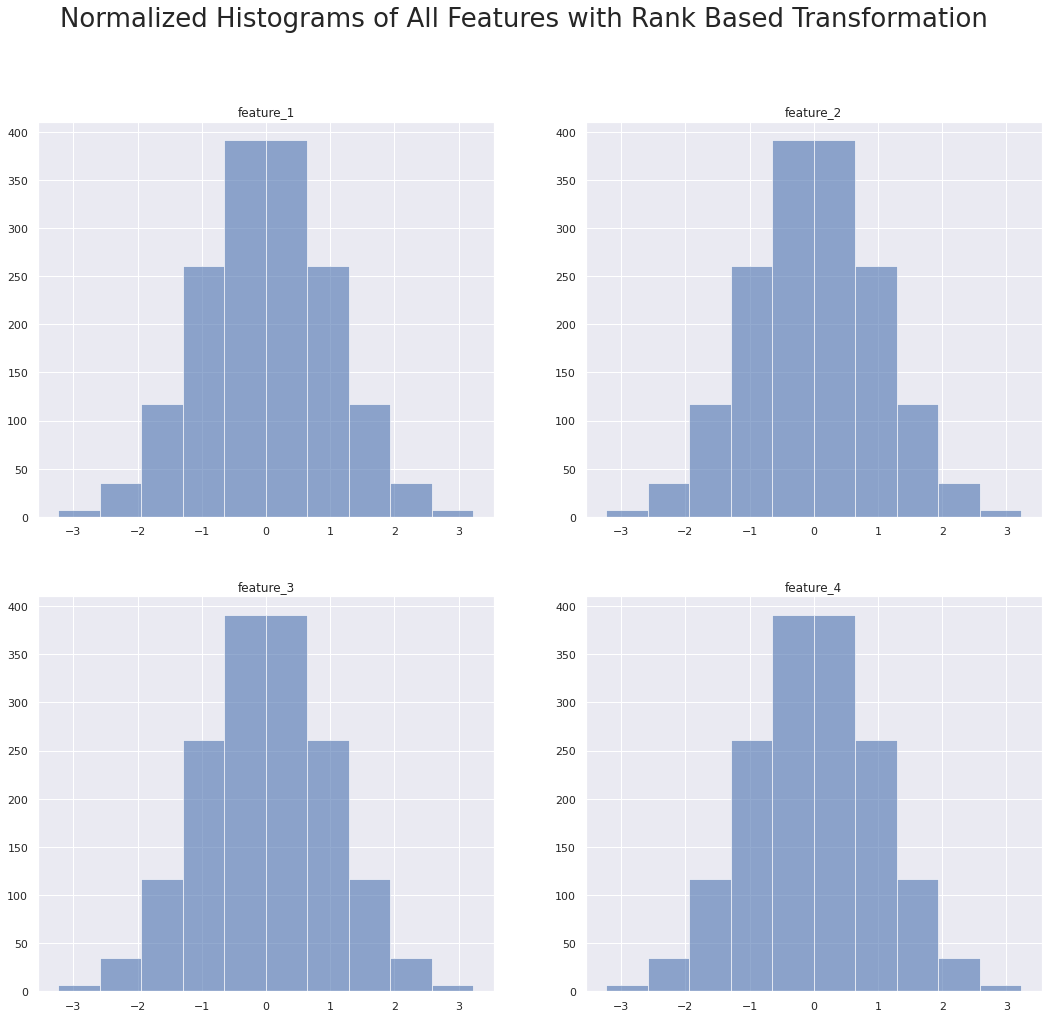

In [201]:
fig, axs = plt.subplots(2, 2,figsize=(18, 16))

for i, col in enumerate(feature.columns):
    row = i // 2
    column = i % 2
    axs[row, column].hist(feature[col], bins=10, alpha=.6)
    axs[row, column].set_title(col)


plt.subplots_adjust(hspace=0.2, wspace=0.2)
fig.suptitle('Normalized Histograms of All Features with Rank Based Transformation',fontsize=26)

plt.show()

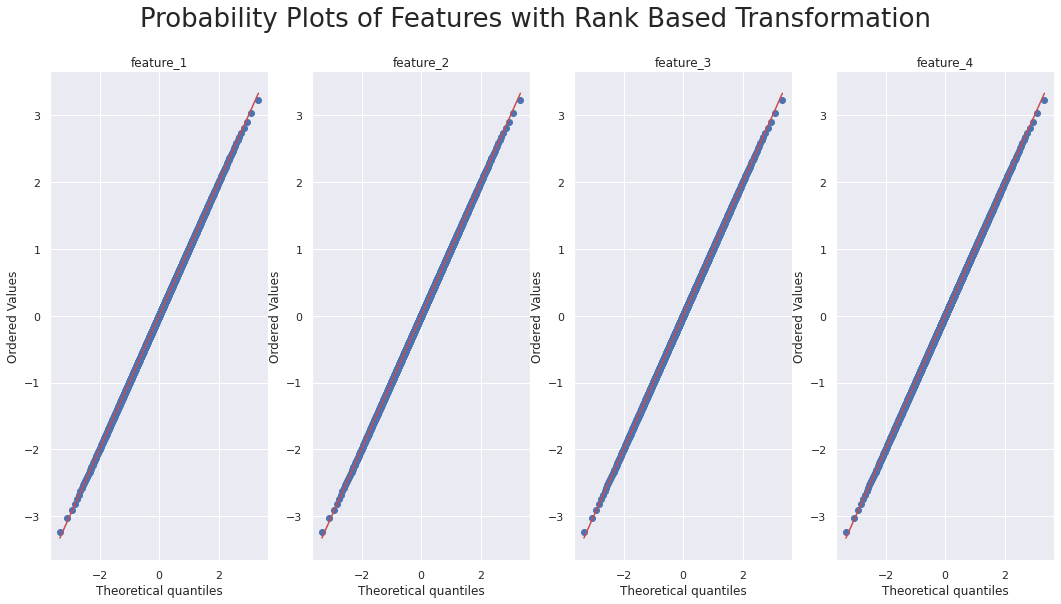

In [203]:
fig, axs = plt.subplots(1, 4, figsize=(18, 9))

for i, col in enumerate(feature.columns):
    stats.probplot(feature[col], plot=axs[i])
    axs[i].set_title(col)

fig.suptitle('Probability Plots of Features with Rank Based Transformation',fontsize=26)
plt.show()


# Dimension Reduction

I applied PCA to our 4 dimensional data to;


*   Reduce Overfitting
*   Improve Visualization 
*   Improve Model Accuracy 





In [61]:
feature['labels'] = labels

pca = PCA(n_components=2)
pca.fit(feature)

feature_2D = pca.transform(feature)


In [62]:
feature_2D

array([[ 0.33312396,  0.00989976],
       [-0.34811023,  0.47462258],
       [ 0.46575145,  0.73454189],
       ...,
       [-1.17740534,  0.59262919],
       [-2.0618787 , -0.86960988],
       [-2.40019582,  0.33010167]])

In [63]:
col_1 = []
col_2 = []

for i in range(len(feature_2D)):
  col_1.append(feature_2D[i][0])
  col_2.append(feature_2D[i][1])


labels = data['isVirus'].astype(int)

In [64]:
df = pd.DataFrame({'col_1': col_1, 'col_2': col_2, 'labels': labels})

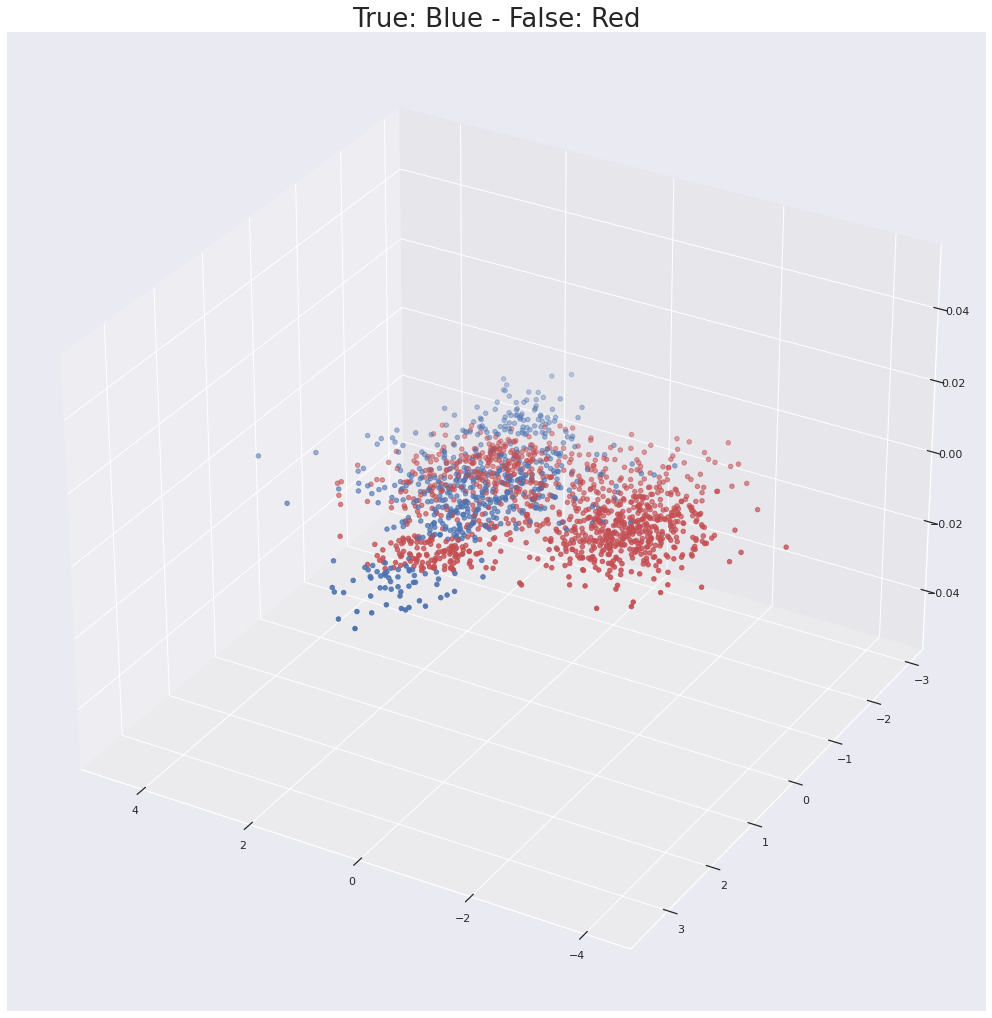

In [65]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
colors = ['r' if label == 0 else 'b' for label in df['labels']]
ax.scatter(df['col_1'], df['col_2'], c=colors)

ax.view_init(elev=30, azim=120)
ax.set_title('True: Blue - False: Red',fontsize=26)
plt.show()


# [1]*

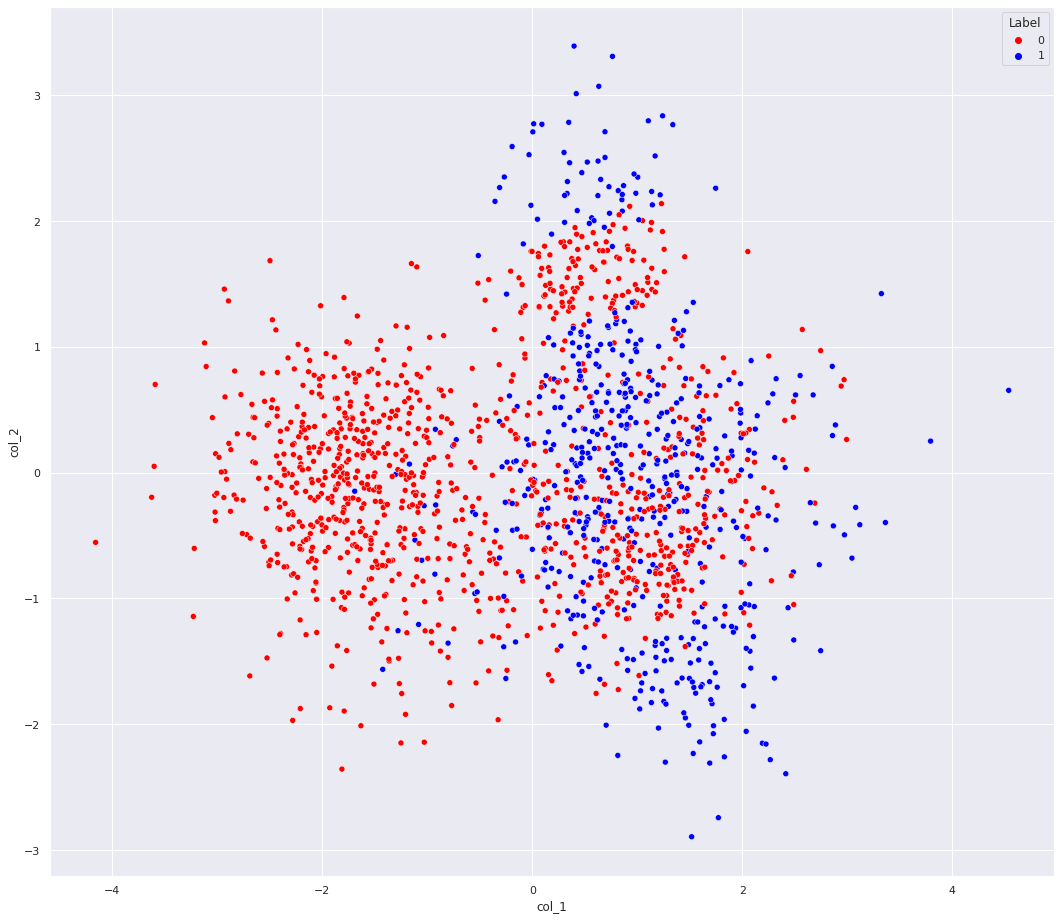

In [67]:
color_dict = {True: 'blue', False: 'red'}

sns.set(rc={'figure.figsize':(18,16)})
sns.scatterplot(x=df['col_1'], y=df['col_2'], data=df, hue='labels', palette=color_dict)

plt.legend(title='Label', loc='best')
plt.show()


# Training 
Now we have a training data which has 2 features with normalized values.

I used different types of Classifier models and used Grid Search for hyper-paramter tunning. In all models Grid Search bringed higher scores for classifying. 

# Logistic Regression

In [69]:
X=df.drop('labels',axis=1)
y=df['labels']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


Accuracy: 0.6461538461538462
Precision: 0.5465116279069767
Recall: 0.3821138211382114
F1 score: 0.4497607655502392


In [106]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[10000],
}

# create logistic regression model
logreg = LogisticRegression()

# create grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# fit the grid search object to the data
try:
    grid_search.fit(X_train, y_train)
except ValueError:
    print("Error occurred during grid search.")


print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.01, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}


In [107]:
logreg = LogisticRegression()
logreg.set_params(**grid_search.best_params_)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


Accuracy: 0.6707692307692308
Precision: 0.66
Recall: 0.2682926829268293
F1 score: 0.38150289017341044


# Decision Treee Classifier

In [18]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


Accuracy: 0.72
Precision: 0.6632653061224489
Recall: 0.5284552845528455
F1 score: 0.588235294117647


In [103]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state':[42]
}


clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)

try:
    grid_search.fit(X_train, y_train)
except ValueError:
    print("Error occurred during grid search.")


print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42, 'splitter': 'best'}


In [105]:
clf = DecisionTreeClassifier()
clf.set_params(**grid_search.best_params_)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


Accuracy: 0.7538461538461538
Precision: 0.6869565217391305
Recall: 0.6422764227642277
F1 score: 0.6638655462184874


# Random Forest Classifier

In [19]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))



Accuracy: 0.7538461538461538
Precision: 0.7945205479452054
Recall: 0.4715447154471545
F1 score: 0.5918367346938775


In [108]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'random_state':[42]
}



rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, param_grid, cv=5)

try:
    grid_search.fit(X_train, y_train)
except ValueError:
    print("Error occurred during grid search.")


print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 42}


In [109]:
rf_clf = RandomForestClassifier()
rf_clf.set_params(**grid_search.best_params_)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


Accuracy: 0.7661538461538462
Precision: 0.7526881720430108
Recall: 0.5691056910569106
F1 score: 0.6481481481481481


# Support Vector Machine

In [116]:
svm_org = svm.SVC(kernel='linear', C=1, random_state=0)
svm_org.fit(X_train, y_train)

y_pred = svm_org.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))



Accuracy: 0.6492307692307693
Precision: 0.56
Recall: 0.34146341463414637
F1 score: 0.42424242424242425


In [117]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0],
    'random_state':[0]
}

svm_ft = svm.SVC()
grid_search = GridSearchCV(svm_ft, param_grid, cv=5)
try:
    grid_search.fit(X_train, y_train)
except ValueError:
    print("Error occurred during grid search.")


print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}


In [118]:
svm = svm.SVC()
svm.set_params(**grid_search.best_params_)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


Accuracy: 0.7476923076923077
Precision: 0.759493670886076
Recall: 0.4878048780487805
F1 score: 0.594059405940594


# K-Neighbors Classifier

In [123]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))



Accuracy: 0.6523076923076923
Precision: 0.5378787878787878
Recall: 0.5772357723577236
F1 score: 0.5568627450980392


In [124]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'n_neighbors':[3]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
try:
    grid_search.fit(X_train, y_train)
except ValueError:
    print("Error occurred during grid search.")


print("Best parameters:", grid_search.best_params_)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [125]:
knn = KNeighborsClassifier()
knn.set_params(**grid_search.best_params_)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


Accuracy: 0.7569230769230769
Precision: 0.7291666666666666
Recall: 0.5691056910569106
F1 score: 0.639269406392694


# Neural Network
Our Classifier Models have quite good for Precision, Recall and F1 Score. But when we look at figure [1] we see that our True and False labels are nested. Therefore to make healthy predictions we need more features. To close this feature gap I trained a simple Neural Network with Tensorflow and I tried and fined the best architecture which yields the best F1 score. 

In [172]:
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

Epoch 1/50
33/33 [==============================] - 1s 9ms/step - loss: 0.6680 - accuracy: 0.6191 - val_loss: 0.6595 - val_accuracy: 0.6846
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.6770 - val_loss: 0.6198 - val_accuracy: 0.6885
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5900 - accuracy: 0.6770 - val_loss: 0.5804 - val_accuracy: 0.6885
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.6770 - val_loss: 0.5474 - val_accuracy: 0.6885
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.6770 - val_loss: 0.5223 - val_accuracy: 0.6885
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.6770 - val_loss: 0.5046 - val_accuracy: 0.6885
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.6770 - val_loss: 0.4944 - val_accuracy: 0.6885
Epoch 8/50
33/33 [==

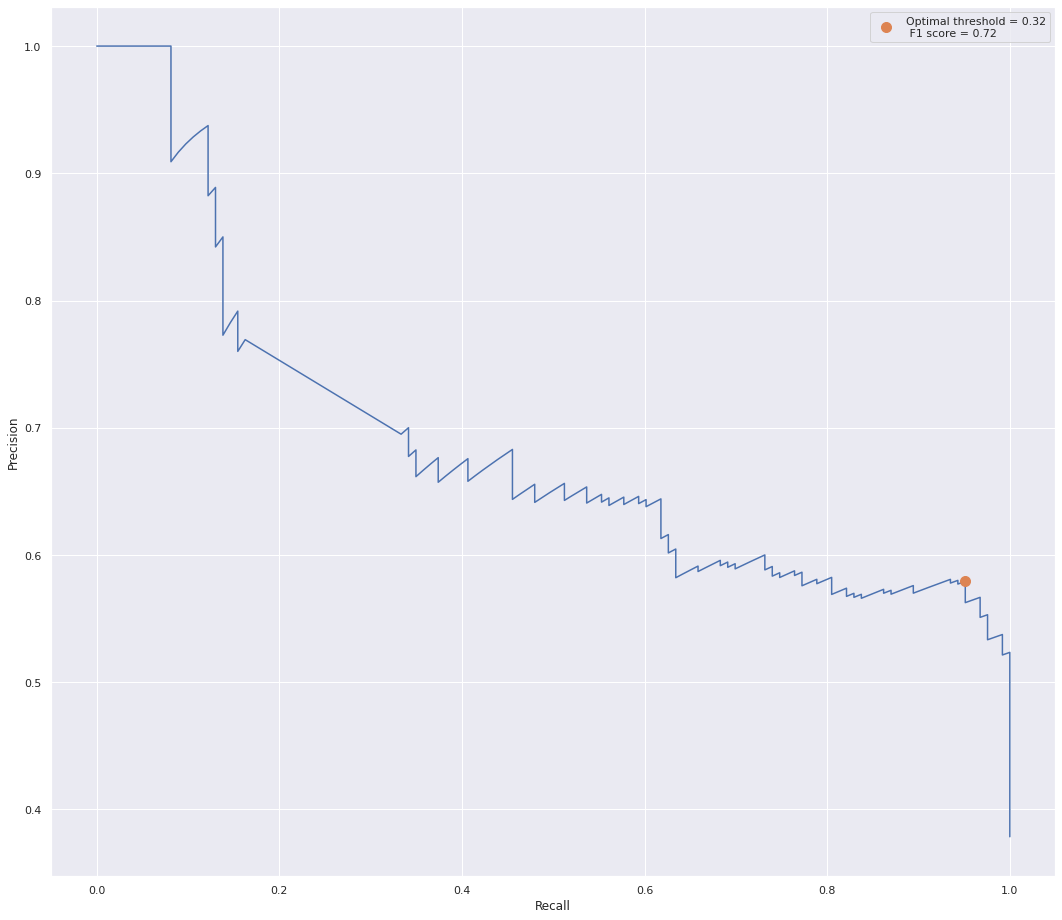

In [173]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fig, ax = plt.subplots(figsize=(18, 16))

ax.plot(recall, precision)

f1_scores = [2*(p*r)/(p+r) for p, r in zip(precision, recall)]
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

ax.plot(recall[optimal_idx], precision[optimal_idx], 'o', markersize=10,
         label=f"Optimal threshold = {optimal_threshold:.2f}\n F1 score = {optimal_f1_score:.2f}")
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()


In [174]:
threshold = optimal_threshold  
y_pred_threshold = (y_pred >= threshold).astype(int) 

f1 = f1_score(y_test, y_pred_threshold)
print("F1 score with threshold {:.2f}: {:.4f}".format(threshold, f1))

F1 score with threshold 0.32: 0.7200


In [175]:
cm = confusion_matrix(y_test, y_pred_threshold)
print(cm)


[[117  85]
 [  6 117]]


In [176]:
model = Sequential()
model.add(Dense(512, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

Epoch 1/50
33/33 [==============================] - 2s 22ms/step - loss: 0.5308 - accuracy: 0.7020 - val_loss: 0.4646 - val_accuracy: 0.6846
Epoch 2/50
33/33 [==============================] - 0s 6ms/step - loss: 0.4876 - accuracy: 0.6808 - val_loss: 0.4589 - val_accuracy: 0.6846
Epoch 3/50
33/33 [==============================] - 0s 8ms/step - loss: 0.4820 - accuracy: 0.6895 - val_loss: 0.4590 - val_accuracy: 0.6731
Epoch 4/50
33/33 [==============================] - 0s 7ms/step - loss: 0.4784 - accuracy: 0.7097 - val_loss: 0.4537 - val_accuracy: 0.7115
Epoch 5/50
33/33 [==============================] - 0s 7ms/step - loss: 0.4700 - accuracy: 0.7329 - val_loss: 0.4441 - val_accuracy: 0.7269
Epoch 6/50
33/33 [==============================] - 0s 6ms/step - loss: 0.4577 - accuracy: 0.7396 - val_loss: 0.4400 - val_accuracy: 0.7538
Epoch 7/50
33/33 [==============================] - 0s 6ms/step - loss: 0.4490 - accuracy: 0.7502 - val_loss: 0.4326 - val_accuracy: 0.7269
Epoch 8/50
33/33 [=

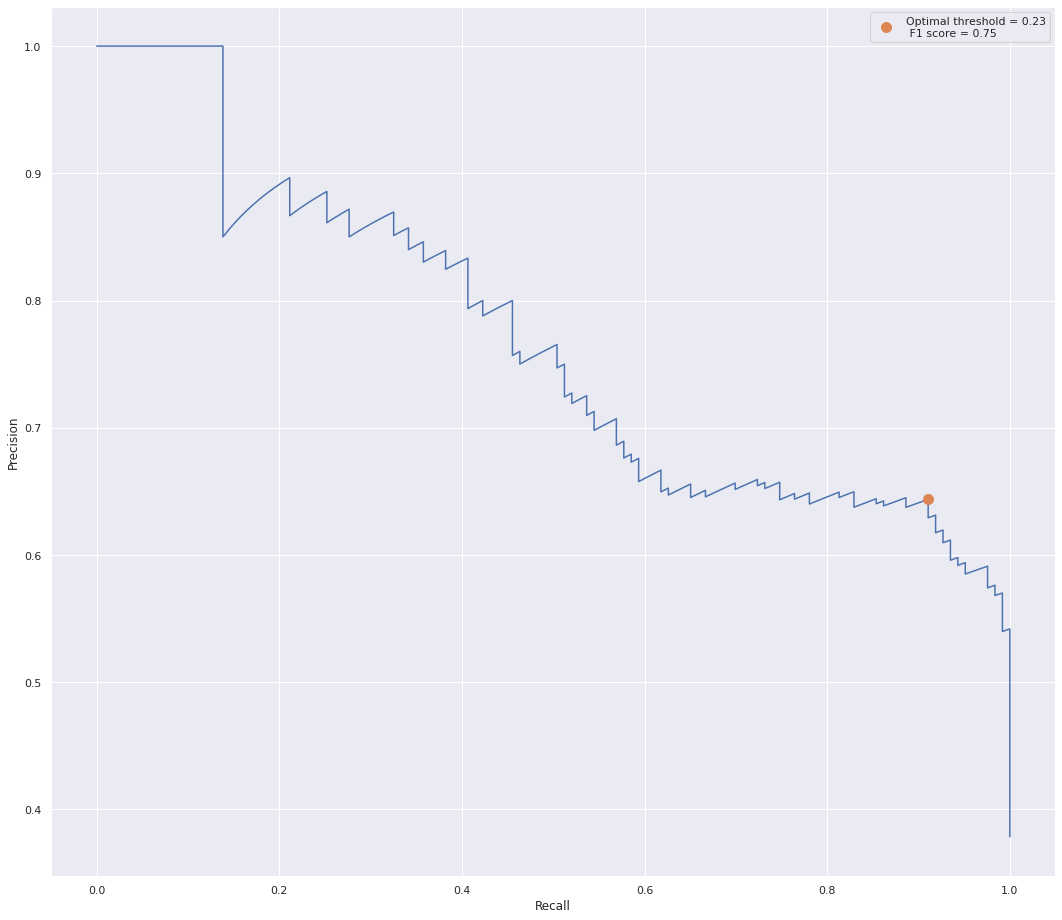

In [177]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fig, ax = plt.subplots(figsize=(18, 16))

ax.plot(recall, precision)

f1_scores = [2*(p*r)/(p+r) for p, r in zip(precision, recall)]
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

ax.plot(recall[optimal_idx], precision[optimal_idx], 'o', markersize=10,
         label=f"Optimal threshold = {optimal_threshold:.2f}\n F1 score = {optimal_f1_score:.2f}")
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()


In [178]:
threshold = optimal_threshold  
y_pred_threshold = (y_pred >= threshold).astype(int)

f1 = f1_score(y_test, y_pred_threshold)
print("F1 score with threshold {:.2f}: {:.4f}".format(threshold, f1))


F1 score with threshold 0.23: 0.7542


In [179]:
cm = confusion_matrix(y_test, y_pred_threshold)
print(cm)


[[140  62]
 [ 11 112]]


In [185]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_filepath = './'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.2,callbacks=[model_checkpoint_callback])
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/400
33/33 [==============================] - 3s 22ms/step - loss: 0.5824 - accuracy: 0.6770 - val_loss: 0.4986 - val_accuracy: 0.6885
Epoch 2/400
33/33 [==============================] - 0s 6ms/step - loss: 0.4946 - accuracy: 0.6770 - val_loss: 0.4680 - val_accuracy: 0.6885
Epoch 3/400
33/33 [==============================] - 0s 6ms/step - loss: 0.4884 - accuracy: 0.6770 - val_loss: 0.4649 - val_accuracy: 0.6885
Epoch 4/400
33/33 [==============================] - 0s 8ms/step - loss: 0.4866 - accuracy: 0.6770 - val_loss: 0.4661 - val_accuracy: 0.6885
Epoch 5/400
33/33 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.6770 - val_loss: 0.4649 - val_accuracy: 0.6885
Epoch 6/400
33/33 [==============================] - 0s 7ms/step - loss: 0.4863 - accuracy: 0.6770 - val_loss: 0.4642 - val_accuracy: 0.6885
Epoch 7/400
33/33 [==============================] - 0s 7ms/step - loss: 0.4859 - accuracy: 0.7252 - val_loss: 0.4627 - val_accuracy: 0.7192
Epoch 8/400


In [186]:
model.load_weights(checkpoint_filepath)
y_pred = model.predict(X_test)


11/11 [==============================] - 0s 1ms/step


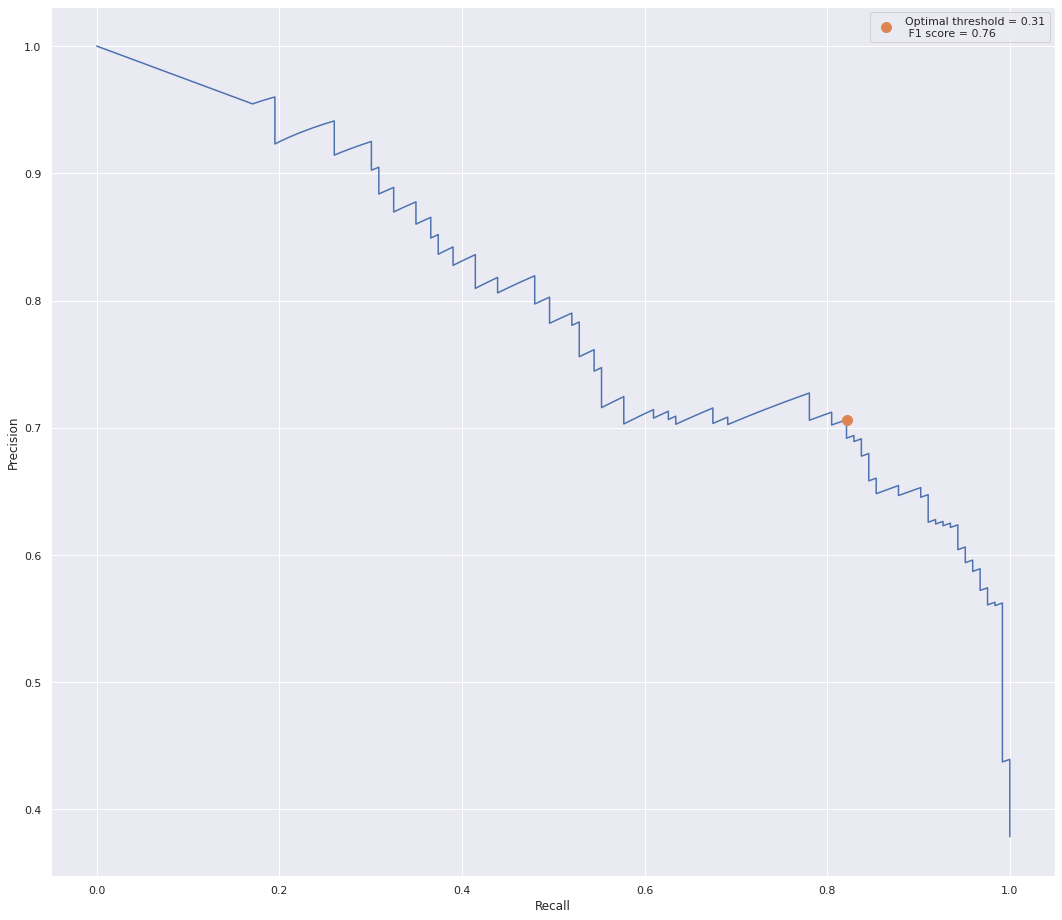

In [187]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
fig, ax = plt.subplots(figsize=(18, 16))

ax.plot(recall, precision)

f1_scores = [2*(p*r)/(p+r) for p, r in zip(precision, recall)]
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

ax.plot(recall[optimal_idx], precision[optimal_idx], 'o', markersize=10,
         label=f"Optimal threshold = {optimal_threshold:.2f}\n F1 score = {optimal_f1_score:.2f}")
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.show()


In [188]:
threshold = optimal_threshold  
y_pred_threshold = (y_pred >= threshold).astype(int)  

f1 = f1_score(y_test, y_pred_threshold)
print("F1 score with threshold {:.2f}: {:.4f}".format(threshold, f1))


F1 score with threshold 0.31: 0.7594


In [189]:
cm = confusion_matrix(y_test, y_pred_threshold)
print(cm)

[[160  42]
 [ 22 101]]


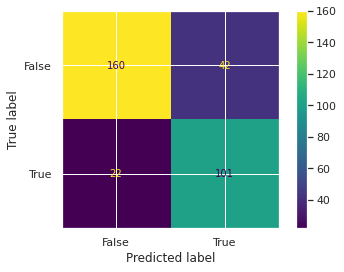

In [190]:
actual = y_test
predicted =y_pred_threshold

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [191]:
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7062937062937062
Recall: 0.8211382113821138


# Threshold Selection

So far we evaluted our Neural Network on optimum F1 Score. This trained model will be employed for the Virus detection case. When our Model detects an input vector as Virus, the program's execution will be killed. In this case Model's success should be evaluted on precision metric. Because we want to know as much as we can to stop the execution of virus. 

In other case where we can inspect the labels (like to obtain more training data for the model) we can use the recall metric since we want to obtain the positive labeled values to have more natural data. 

To have a more precise model threshold value can be increased to have higher precision score. 

To increase the recall score the threshold value should be decreased.

# Higher Precision 

In [230]:
threshold = .7
y_pred_test = (y_pred >= threshold).astype(int)  

f1 = f1_score(y_test, y_pred_test)
print("F1 score with threshold {:.2f}: {:.4f}".format(threshold, f1))


F1 score with threshold 0.70: 0.4578


In [231]:
cm = metrics.confusion_matrix(y_test, y_pred_test)

TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8837209302325582
Recall: 0.3089430894308943


# Higher Recall

In [232]:
threshold = .2
y_pred_test = (y_pred >= threshold).astype(int)  

f1 = f1_score(y_test, y_pred_test)
print("F1 score with threshold {:.2f}: {:.4f}".format(threshold, f1))


F1 score with threshold 0.20: 0.7491


In [233]:
cm = metrics.confusion_matrix(y_test, y_pred_test)

TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.6488095238095238
Recall: 0.8861788617886179
